In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Due to the problem's nature, try to create features that give an idea of the location 
# of passengers during the abnormality

df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")


print("Train shape:", df_train.shape)
print("Test shape:", df_test.shape)
print(df_train.columns)
print()
null_values_per_column = df_train.isnull().sum()
print(null_values_per_column)

print()
print(df_train.describe())
print()

print()
print(df_train.dtypes)
print()
# HomePlanet Feature
print("HomePlanet uniques:", df_train["HomePlanet"].unique())
n_HomePlanet_uniques = df_train["HomePlanet"].unique().shape[0]
print("HomePlanet unique count:", n_HomePlanet_uniques)

# Cabin Feature
print("Cabin uniques:", df_train["Cabin"].unique())
n_Cabin_uniques = df_train["Cabin"].unique().shape[0]
print("Cabin unique count:", n_Cabin_uniques)

# Destination Feature
print("Destination uniques:", df_train["Destination"].unique())
n_Destination_uniques = df_train["Destination"].unique().shape[0]
print("Destination unique count:", n_Destination_uniques)
print()

# Attention to 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck' features,
# they looks like to have many outliers

# Null values

#df_train = df_train.dropna() # Only for now

indexes = df_train.index
n = df_train.shape[0]


Train shape: (8693, 14)
Test shape: (4277, 13)
Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

               Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000

# Group Size

Size 1 | Transported Rate = 0.45244536940686786
Size 2 | Transported Rate = 0.5380499405469679
Size 3 | Transported Rate = 0.5931372549019608
Size 4 | Transported Rate = 0.6407766990291263
Size 5 | Transported Rate = 0.5924528301886792
Size 6 | Transported Rate = 0.6149425287356322
Size 7 | Transported Rate = 0.5411255411255411
Size 8 | Transported Rate = 0.3942307692307692
GroupSize
0    4805
1    3114
2     774
Name: count, dtype: int64
GroupSize
0    2340
1    1598
2     339
Name: count, dtype: int64


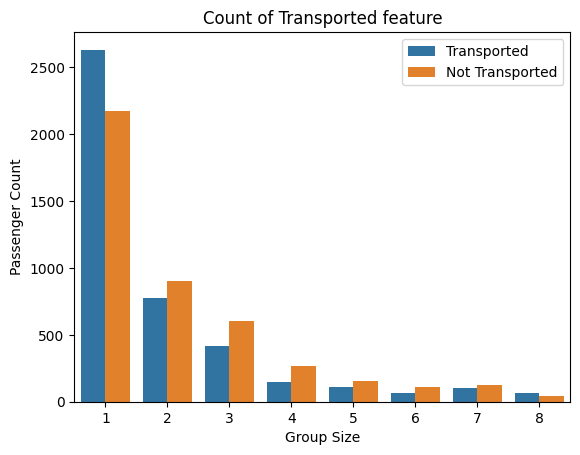

In [158]:
def group_size(df_train, train = True):
    df_copy = df_train.copy()
    df_copy["PassengerId"] = df_copy["PassengerId"].apply(lambda x: int(x[:4]))
    values_frequency = df_copy["PassengerId"].value_counts()
    df_copy["GroupSize"] = df_copy["PassengerId"].apply(lambda x: values_frequency.loc[x])

    if train:
        for i in range(1,9):
            group_i = df_copy[df_copy["GroupSize"] == i ]
            transported_i = group_i[ group_i["Transported"] == True ]
            print("Size {} | Transported Rate = {}".format( i , transported_i.shape[0] / group_i.shape[0] ))
        
        ax = sns.countplot(x='GroupSize', hue='Transported', data=df_copy)
        plt.xlabel('Group Size')
        plt.ylabel('Passenger Count')
        plt.legend(["Transported", "Not Transported"])
        plt.title("Count of Transported feature")
    
    def final_categories(x):
        if pd.isna(x):
            return x
            
        elif x == 1: 
            return 0 # Singular "group"
    
        elif x <= 4:
            return 1 # Medium group
    
        else:
            return 2 # Big group
            
    df_train["GroupSize"] = df_copy["GroupSize"].apply(final_categories)
    print(df_train["GroupSize"].value_counts())
    return df_train

df_train = group_size(df_train)
df_test = group_size(df_test, train = False)

# Family Size

Size 1 | Transported Rate = 0.5837696335078534
Size 2 | Transported Rate = 0.49375
Size 3 | Transported Rate = 0.5343642611683849
Size 4 | Transported Rate = 0.50390625
Size 5 | Transported Rate = 0.509375
Size 6 | Transported Rate = 0.49903660886319845
Size 7 | Transported Rate = 0.48139255702280914
Size 8 | Transported Rate = 0.4540441176470588
Size 9 | Transported Rate = 0.48253968253968255
Size 10 | Transported Rate = 0.51
Size 11 | Transported Rate = 0.5054545454545455
Size 12 | Transported Rate = 0.42857142857142855
Size 13 | Transported Rate = 0.46153846153846156
Size 14 | Transported Rate = 0.48214285714285715
Size 15 | Transported Rate = 0.6
Size 16 | Transported Rate = 0.375
FamilySize
1.0    3695
0.0    3626
2.0    1172
Name: count, dtype: int64
FamilySize
0.0    3067
1.0    1004
2.0     112
Name: count, dtype: int64


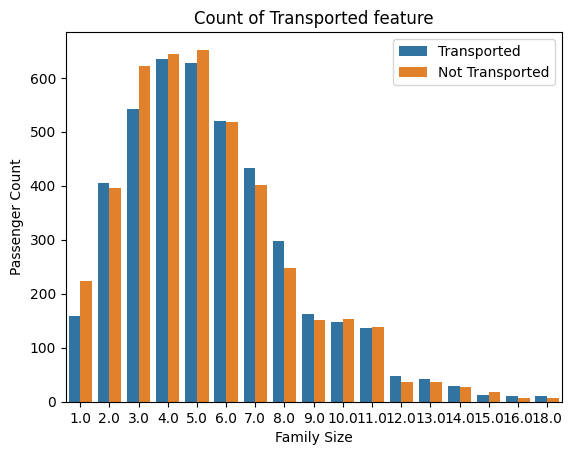

In [159]:
def family_size(df_train, train = True):
    df_copy = df_train.copy()
    df_copy["Name"] = df_copy["Name"].apply(lambda x: x.split()[-1] if type(x)==str else x)
    values_frequency = df_copy["Name"].value_counts()
    df_copy["FamilySize"] = df_copy["Name"].apply(lambda x: values_frequency.loc[x] if type(x)==str else x)

    if train:
        for i in range(1,18):
            group_i = df_copy[df_copy["FamilySize"] == i ]
            if group_i.shape[0] == 0: continue
            transported_i = group_i[ group_i["Transported"] == True ]
            print("Size {} | Transported Rate = {}".format( i , transported_i.shape[0] / group_i.shape[0] ))
        
        ax = sns.countplot(x='FamilySize', hue='Transported', data=df_copy)
        plt.xlabel('Family Size')
        plt.ylabel('Passenger Count')
        plt.legend(["Transported", "Not Transported"])
        plt.title("Count of Transported feature")
    
    def final_categories(x):
        if pd.isna(x):
            return x
            
        elif x <= 4: 
            return 0 # Small family
    
        elif x <= 8:
            return 1 # Medium family
    
        else:
            return 2 # Big family
            
    df_train["FamilySize"] = df_copy["FamilySize"].apply(final_categories)
    print(df_train["FamilySize"].value_counts())
    return df_train

df_train = family_size(df_train)
df_test = family_size(df_test, train = False)

# Analysing: HomePlanet and Destination 

In [160]:
def homeplanet_destination(df_train, train = True):
    df_copy = df_train.copy()
    
    for home_name in df_copy["HomePlanet"].unique():
        if type(home_name) != str: continue
        df_ishome = df_copy["HomePlanet"] == home_name
        df_train[home_name] = df_ishome
        if train:
            n_transported = (df_copy[df_ishome]["Transported"]==True).sum()
            print("Home: {}, Transported Rate: {}".format(home_name, n_transported/n))
    
    for destination_name in df_copy["Destination"].unique():
        if type(destination_name) != str: continue
        df_isdestination = df_copy["Destination"] == destination_name
        df_train[destination_name] = df_isdestination
        if train:
            n_transported = (df_copy[df_isdestination]["Transported"]==True).sum()
            print("Home: {}, Transported Rate: {}".format(destination_name, n_transported/n))

    return df_train

df_train = homeplanet_destination(df_train)
df_test = homeplanet_destination(df_test, train = False)

Home: Europa, Transported Rate: 0.16150926032439894
Home: Earth, Transported Rate: 0.22443345220292188
Home: Mars, Transported Rate: 0.10583227884504774
Home: TRAPPIST-1e, Transported Rate: 0.320602783849074
Home: PSO J318.5-22, Transported Rate: 0.046129069366156676
Home: 55 Cancri e, Transported Rate: 0.12630852409985047


# Analysing: Cabin

In [161]:
def decks_sides(df_train, train = True):
    df_copy = df_train.copy()
    decks = (df_copy["Cabin"].apply(lambda x: x[0] if type(x)==str else x).unique())
    print("Decks:")
    for deck in decks:
        if type(deck) != str: continue
        df_isdeck = df_copy["Cabin"].apply(lambda x:x[0] if type(x)==str else x) == deck
        df_train["Deck_"+deck] = df_isdeck
        n_deck = df_isdeck.sum()
        if train:
            n_transported = (df_copy[df_isdeck]["Transported"] == True).sum()
            print(deck, n_transported/n_deck)
            print(n_transported, n_deck)
    
    print("Sides:")
    sides = (df_copy["Cabin"].apply(lambda x: x[-1] if type(x)==str else x).unique())
    for side in sides:
        if type(side) != str: continue
        df_isside = df_copy["Cabin"].apply(lambda x:x[-1] if type(x)==str else x) == side
        df_train["Side_"+side] = df_isside
        n_side = df_isside.sum()
        if train:
            n_transported = (df_copy[df_isside]["Transported"] == True).sum()
            print(side, n_transported/n_side)
            print(n_transported, n_side)
    
    df_train = df_train.drop("Deck_T", axis = 1)
    return df_train

df_train = decks_sides(df_train)
df_test = decks_sides(df_test, train = False)

Decks:
B 0.7342747111681643
572 779
F 0.43987115246957764
1229 2794
A 0.49609375
127 256
G 0.5162172723720203
1321 2559
E 0.3573059360730594
313 876
D 0.4330543933054393
207 478
C 0.6800535475234271
508 747
T 0.2
1 5
Sides:
P 0.4512601046124584
1898 4206
S 0.5550373134328358
2380 4288
Decks:
Sides:


# Comparing Transported and Not Transported stats

In [162]:
# Comparing Transported and Not Transported dataframes
transported_df = df_train[ df_train["Transported"] == True ]
not_transported_df = df_train[ df_train["Transported"] == False ]

transported_stats = transported_df.describe()
not_transported_stats = not_transported_df.describe()

comparing_df = pd.DataFrame()
comparing_df["T Mean"] = transported_stats.loc["mean"]
comparing_df["NT Mean"] = not_transported_stats.loc["mean"]
comparing_df["T Std"] = transported_stats.loc["std"]
comparing_df["NT Std"] = not_transported_stats.loc["std"]

print(comparing_df)

                  T Mean     NT Mean        T Std       NT Std
Age            27.748834   29.922858    15.151705    13.699262
RoomService    63.098021  389.266066   274.812497   875.638123
FoodCourt     532.691984  382.615930  1931.306995  1200.115601
ShoppingMall  179.829972  167.566217   722.026714   456.528126
Spa            61.675531  564.382666   262.682871  1551.356047
VRDeck         69.148131  543.629822   291.658171  1563.088368
GroupSize       0.601645    0.469988     0.660458     0.639248
FamilySize      0.693477    0.728890     0.693608     0.693833


# Analysing the five money features

## RoomService

count    8512.000000
mean        4.780588
std        14.185482
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max       304.829787
Name: RoomService, dtype: float64
CatRoomService
0    5773
2    1670
1    1250
Name: count, dtype: int64
count    4195.000000
mean        4.137099
std        11.453043
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max       218.245283
Name: RoomService, dtype: float64
CatRoomService
0    2794
2     921
1     562
Name: count, dtype: int64


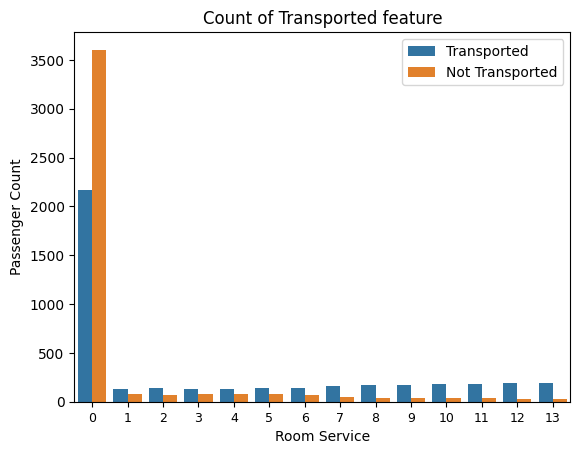

In [163]:
from sklearn.preprocessing import RobustScaler, LabelEncoder

def roomservice(df_train, train = True):
    df_copy = df_train.copy()
    scaler = RobustScaler()
    label_encoder = LabelEncoder()
    df_copy["RoomService"] = scaler.fit_transform(np.array(df_copy["RoomService"]).reshape(-1,1))
    print(df_copy["RoomService"].describe())
    df_copy["RoomService"] = pd.qcut(df_copy["RoomService"], 40, duplicates = "drop")
    all_intervals = df_copy["RoomService"].cat.categories
    
    
    #df_copy["RoomService"] = pd.cut(df_copy["RoomService"], [-1, 0.01, 2.5, 250])
    if train:
        ax = sns.countplot(x='RoomService', hue='Transported', data=df_copy)
        plt.xlabel('Room Service')
        plt.ylabel('Passenger Count')
        plt.legend(["Transported", "Not Transported"])
        plt.title("Count of Transported feature")
        n_intervals = all_intervals.size
        ax.set_xticklabels(range(n_intervals), size = 9)
    
    df_copy["RoomService"] = label_encoder.fit_transform(df_copy["RoomService"])
    def final_categories(x):
        if pd.isna(x):
            return x
            
        elif x == 0: 
            return 0
    
        elif x <= 6:
            return 1
    
        else:
            return 2
            
    df_train["CatRoomService"] = df_copy["RoomService"].apply(final_categories)
    print(df_train["CatRoomService"].value_counts())
    return df_train

df_train = roomservice(df_train)
df_test = roomservice(df_test, train = False)

## FoodCourt

count    8510.000000
mean        6.027332
std        21.203806
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max       392.276316
Name: FoodCourt, dtype: float64
CatFoodCourt
0    5572
1    1522
2     706
4     467
3     426
Name: count, dtype: int64
count    4171.000000
mean        5.634414
std        19.585424
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max       324.012821
Name: FoodCourt, dtype: float64
CatFoodCourt
0    2749
1     727
2     347
4     245
3     209
Name: count, dtype: int64


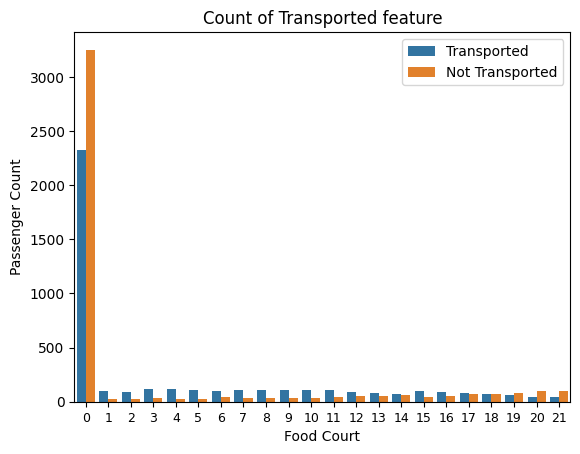

In [164]:
from sklearn.preprocessing import RobustScaler, LabelEncoder

def foodcourt(df_train, train = True):
    df_copy = df_train.copy()
    scaler = RobustScaler()
    label_encoder = LabelEncoder()
    df_copy["FoodCourt"] = scaler.fit_transform(np.array(df_copy["FoodCourt"]).reshape(-1,1))
    print(df_copy["FoodCourt"].describe())
    df_copy["FoodCourt"] = pd.qcut(df_copy["FoodCourt"], 60, duplicates = "drop")
    all_intervals = df_copy["FoodCourt"].cat.categories
    
    
    if train:
        ax = sns.countplot(x='FoodCourt', hue='Transported', data=df_copy)
        plt.xlabel('Food Court')
        plt.ylabel('Passenger Count')
        plt.legend(["Transported", "Not Transported"])
        plt.title("Count of Transported feature")
        n_intervals = all_intervals.size
        ax.set_xticklabels(range(n_intervals), size = 9)
    
    df_copy["FoodCourt"] = label_encoder.fit_transform(df_copy["FoodCourt"])
    def final_categories(x):
        if pd.isna(x):
            return x
            
        elif x == 0: 
            return 0
    
        elif x <= 11:
            return 1
    
        elif x <= 16:
            return 2
    
        elif x <= 19:
            return 3
            
        else:
            return 4
            
    df_train["CatFoodCourt"] = df_copy["FoodCourt"].apply(final_categories)
    print(df_train["CatFoodCourt"].value_counts())
    return df_train

df_train = foodcourt(df_train)
df_test = foodcourt(df_test, train = False)

## ShoppingMall  

count    8485.000000
mean        6.434414
std        22.396165
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max       870.074074
Name: ShoppingMall, dtype: float64
CatShoppingMall
0    5740
1    1896
2     566
3     491
Name: count, dtype: int64
count    4179.000000
mean        5.372592
std        16.994579
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max       251.272727
Name: ShoppingMall, dtype: float64
CatShoppingMall
0    2816
1     945
2     278
3     238
Name: count, dtype: int64


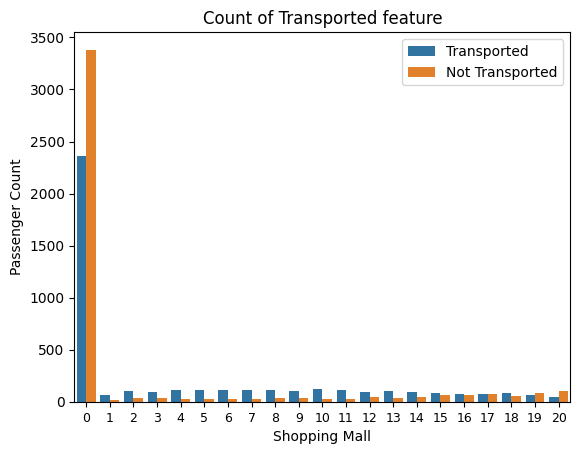

In [165]:
from sklearn.preprocessing import RobustScaler, LabelEncoder

def shoppingmall(df_train, train = True):
    df_copy = df_train.copy()
    scaler = RobustScaler()
    label_encoder = LabelEncoder()
    df_copy["ShoppingMall"] = scaler.fit_transform(np.array(df_copy["ShoppingMall"]).reshape(-1,1))
    print(df_copy["ShoppingMall"].describe())
    df_copy["ShoppingMall"] = pd.qcut(df_copy["ShoppingMall"], 60, duplicates = "drop")
    all_intervals = df_copy["ShoppingMall"].cat.categories
    
    
    if train:
        ax = sns.countplot(x='ShoppingMall', hue='Transported', data=df_copy)
        plt.xlabel('Shopping Mall')
        plt.ylabel('Passenger Count')
        plt.legend(["Transported", "Not Transported"])
        plt.title("Count of Transported feature")
        n_intervals = all_intervals.size
        ax.set_xticklabels(range(n_intervals), size = 9)
    
    df_copy["ShoppingMall"] = label_encoder.fit_transform(df_copy["ShoppingMall"])
    def final_categories(x):
        if pd.isna(x):
            return x
            
        elif x == 0: 
            return 0
    
        elif x <= 14:
            return 1
    
        elif x <= 18:
            return 2
            
        else:
            return 3
            
    df_train["CatShoppingMall"] = df_copy["ShoppingMall"].apply(final_categories)
    print(df_train["CatShoppingMall"].value_counts())
    return df_train

df_train = shoppingmall(df_train)
df_test = shoppingmall(df_test, train = False)

## Spa

count    8510.000000
mean        5.273539
std        19.266196
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max       379.796610
Name: Spa, dtype: float64
CatSpa
0    5470
1    1338
2     709
3     709
4     467
Name: count, dtype: int64
count    4176.000000
mean        6.061049
std        22.343720
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max       396.880000
Name: Spa, dtype: float64
CatSpa
0    2683
1     658
2     349
3     346
4     241
Name: count, dtype: int64


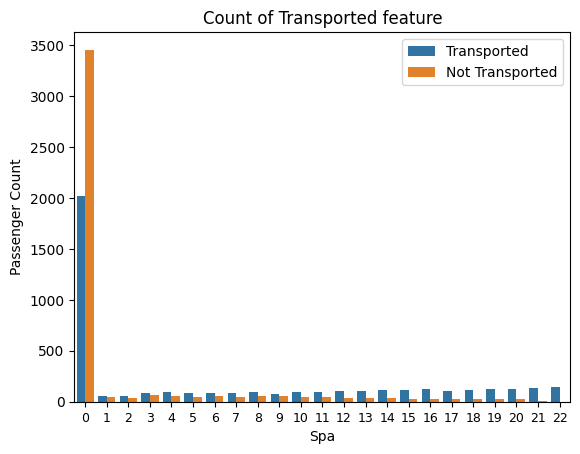

In [166]:
from sklearn.preprocessing import RobustScaler, LabelEncoder

def spa(df_train, train = True):
    df_copy = df_train.copy()
    scaler = RobustScaler()
    label_encoder = LabelEncoder()
    df_copy["Spa"] = scaler.fit_transform(np.array(df_copy["Spa"]).reshape(-1,1))
    print(df_copy["Spa"].describe())
    df_copy["Spa"] = pd.qcut(df_copy["Spa"], 60, duplicates = "drop")
    all_intervals = df_copy["Spa"].cat.categories
    
    
    if train:
        ax = sns.countplot(x='Spa', hue='Transported', data=df_copy)
        plt.xlabel('Spa')
        plt.ylabel('Passenger Count')
        plt.legend(["Transported", "Not Transported"])
        plt.title("Count of Transported feature")
        n_intervals = all_intervals.size
        ax.set_xticklabels(range(n_intervals), size = 9)
    
    df_copy["Spa"] = label_encoder.fit_transform(df_copy["Spa"])
    def final_categories(x):
        if pd.isna(x):
            return x
            
        elif x == 0: 
            return 0
    
        elif x <= 10:
            return 1
    
        elif x <= 15:
            return 2
    
        elif x <= 20:
            return 3
            
        else:
            return 4
            
    df_train["CatSpa"] = df_copy["Spa"].apply(final_categories)
    print(df_train["CatSpa"].value_counts())
    return df_train

df_train = spa(df_train)
df_test = spa(df_test, train = False)

## VRDeck

count    8505.000000
mean        6.627278
std        24.906895
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max       524.630435
Name: VRDeck, dtype: float64
CatVRDeck
0    5634
1    1879
2     709
3     471
Name: count, dtype: int64
count    4197.000000
mean        8.630834
std        34.638743
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max       618.666667
Name: VRDeck, dtype: float64
CatVRDeck
0    2829
1     948
2     350
3     150
Name: count, dtype: int64


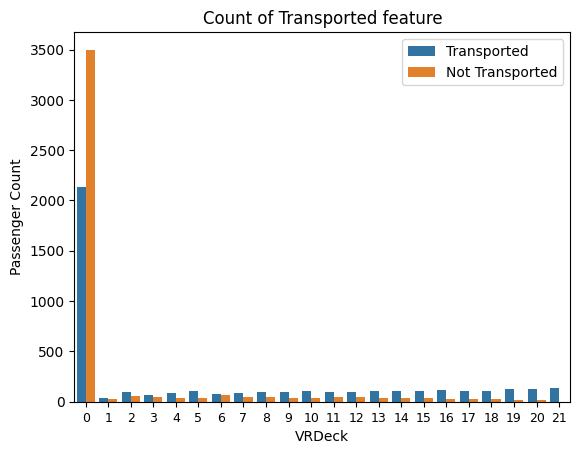

In [167]:
from sklearn.preprocessing import RobustScaler, LabelEncoder

def vrdeck(df_train, train = True):
    df_copy = df_train.copy()
    scaler = RobustScaler()
    label_encoder = LabelEncoder()
    df_copy["VRDeck"] = scaler.fit_transform(np.array(df_copy["VRDeck"]).reshape(-1,1))
    print(df_copy["VRDeck"].describe())
    df_copy["VRDeck"] = pd.qcut(df_copy["VRDeck"], 60, duplicates = "drop")
    all_intervals = df_copy["VRDeck"].cat.categories
    
    
    if train:
        ax = sns.countplot(x='VRDeck', hue='Transported', data=df_copy)
        plt.xlabel('VRDeck')
        plt.ylabel('Passenger Count')
        plt.legend(["Transported", "Not Transported"])
        plt.title("Count of Transported feature")
        n_intervals = all_intervals.size
        ax.set_xticklabels(range(n_intervals), size = 9)
    
    df_copy["VRDeck"] = label_encoder.fit_transform(df_copy["VRDeck"])
    def final_categories(x):
        if pd.isna(x):
            return x
            
        elif x == 0: 
            return 0
    
        elif x <= 14:
            return 1
    
        elif x <= 19:
            return 2
            
        else:
            return 3
            
    df_train["CatVRDeck"] = df_copy["VRDeck"].apply(final_categories)
    print(df_train["CatVRDeck"].value_counts())
    return df_train

df_train = vrdeck(df_train)
df_test = vrdeck(df_test, train = False)

Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'Transported', 'GroupSize', 'FamilySize', 'Europa',
       'Earth', 'Mars', 'TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e',
       'Deck_B', 'Deck_F', 'Deck_A', 'Deck_G', 'Deck_E', 'Deck_D', 'Deck_C',
       'Side_P', 'Side_S', 'CatRoomService', 'CatFoodCourt', 'CatShoppingMall',
       'CatSpa', 'CatVRDeck'],
      dtype='object')

Transported        1.000000
CryoSleep          0.468645
Europa             0.176916
Deck_B             0.144733
55 Cancri e        0.108722
Deck_C             0.108193
Side_S             0.101455
GroupSize          0.100765
FoodCourt          0.046566
Mars               0.019544
Deck_G             0.016269
ShoppingMall       0.010141
PSO J318.5-22      0.000092
Deck_A            -0.002623
FamilySize        -0.025518
Deck_D            -0.034046
VIP               -0.037650
CatFoodCourt      -0.071130
Age               -0.075026
Deck_F            -0.087753
TRAP

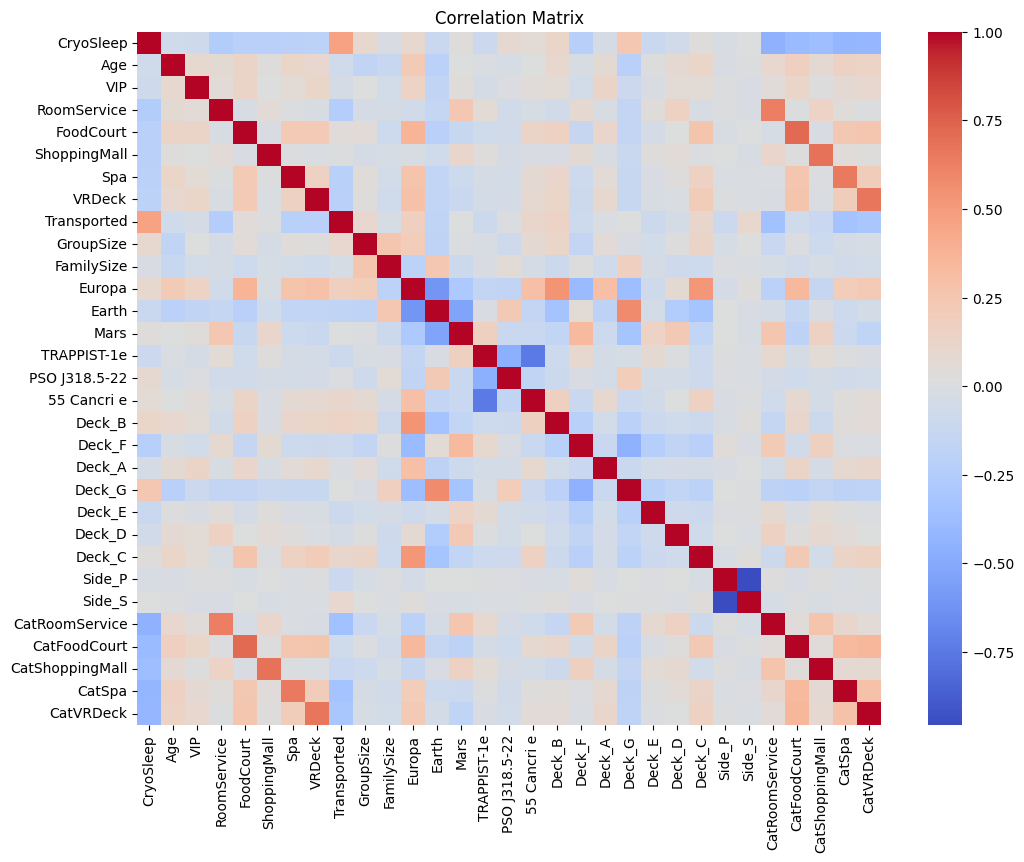

In [168]:
correlation_df = df_train.copy()
correlation_df = correlation_df.drop(columns = ["PassengerId", "HomePlanet", "Cabin", "Destination", "Name"])
print(correlation_df.columns)
print()
correlation_matrix = correlation_df.corr()
print(correlation_matrix["Transported"].sort_values(ascending = False).T)

plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', annot_kws={"size": 12})
plt.title('Correlation Matrix')
plt.show()




In [169]:
print(df_train.head())
print(df_train.columns)

def nullvalues(df_train):
    for i in df_train.index:
        line = df_train.iloc[i]
        if pd.isna(line["HomePlanet"]):
            for column in ['Europa', 'Earth','Mars']:
                df_train.loc[i,column] = np.nan
    
        if pd.isna(line["Destination"]):
            for column in ['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e']:
                df_train.loc[i,column] = np.nan
    
        if pd.isna(line["Cabin"]):
            for column in ['Deck_B','Deck_F', 'Deck_A', 'Deck_G', 'Deck_E', 'Deck_D', 'Deck_C', 'Side_P','Side_S']:
                df_train.loc[i,column] = np.nan

        if pd.isna(line["RoomService"]):
            df_train.loc[i,"CatRoomService"] = np.nan

        if pd.isna(line["FoodCourt"]):
            df_train.loc[i,"CatFoodCourt"] = np.nan

        if pd.isna(line["ShoppingMall"]):
            df_train.loc[i,"CatShoppingMall"] = np.nan

        if pd.isna(line["Spa"]):
            df_train.loc[i,"CatSpa"] = np.nan

        if pd.isna(line["VRDeck"]):
            df_train.loc[i,"CatVRDeck"] = np.nan

    return df_train

df_train = nullvalues(df_train)
df_test = nullvalues(df_test)

print()
null_values_per_column = df_train.isnull().sum()
print(null_values_per_column)

  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall  ...  Deck_E  Deck_D Deck_C  Side_P  \
0          0.0        0.0           0.0  ...   False   False  False    True   
1        109.0        9.0          25.0  ...   False   False  False   False   
2         43.0     3576.0           0.0  ...   False   False  False   False   
3          0.0     1283.0         371.0  ...   False   False  False   False   
4        303.0       70.0         151.0  ...   False   False  False   False   

   Side_S  CatRoomService  CatFoodCourt  CatShoppingMall  CatSpa  CatVRDeck  
0   False           

In [170]:
def filter_imputer(df_train , train = True):
    if train:
        selected_columns = ['CryoSleep', 'Age',
           'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'CatRoomService', 'CatFoodCourt', 'CatShoppingMall', 'CatSpa', 'CatVRDeck','Transported', 'GroupSize', 'FamilySize', 'Europa', 'Earth',
           'Mars', 'TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', 'Deck_B',
           'Deck_F', 'Deck_A', 'Deck_G', 'Deck_E', 'Deck_D', 'Deck_C', 'Side_P',
           'Side_S']
    else:
        selected_columns = ['CryoSleep', 'Age',
           'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'CatRoomService', 'CatFoodCourt', 'CatShoppingMall', 'CatSpa', 'CatVRDeck', 'GroupSize', 'FamilySize', 'Europa', 'Earth',
           'Mars', 'TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', 'Deck_B',
           'Deck_F', 'Deck_A', 'Deck_G', 'Deck_E', 'Deck_D', 'Deck_C', 'Side_P',
           'Side_S']
    df_train_filtered = df_train[selected_columns]
    print(df_train_filtered.head())
    null_values_per_column = df_train_filtered.isnull().sum()
    print(null_values_per_column)
    
    from sklearn.experimental import enable_iterative_imputer
    from sklearn.impute import IterativeImputer
    
    imp = IterativeImputer(max_iter=20, random_state=23)
    imp.fit(df_train_filtered)
    df_train_final = pd.DataFrame(imp.transform(df_train_filtered)).astype(int)
    df_train_final.columns = selected_columns
    null_values_per_column = df_train_final.isnull().sum()
    print(null_values_per_column)
    return df_train_filtered, df_train_final

df_train_filtered, df_train_final = filter_imputer(df_train)
df_test_filtered, df_test_final = filter_imputer(df_test, train = False)

  CryoSleep   Age    VIP  RoomService  FoodCourt  ShoppingMall     Spa  \
0     False  39.0  False          0.0        0.0           0.0     0.0   
1     False  24.0  False        109.0        9.0          25.0   549.0   
2     False  58.0   True         43.0     3576.0           0.0  6715.0   
3     False  33.0  False          0.0     1283.0         371.0  3329.0   
4     False  16.0  False        303.0       70.0         151.0   565.0   

   VRDeck  CatRoomService  CatFoodCourt  ...  55 Cancri e  Deck_B  Deck_F  \
0     0.0             0.0           0.0  ...        False    True   False   
1    44.0             1.0           1.0  ...        False   False    True   
2    49.0             1.0           3.0  ...        False   False   False   
3   193.0             0.0           2.0  ...        False   False   False   
4     2.0             1.0           1.0  ...        False   False    True   

   Deck_A  Deck_G  Deck_E Deck_D Deck_C Side_P Side_S  
0   False   False   False  False  Fa

In [172]:
df_train_final.to_csv("final_data/df.csv", index = False)
df_test_final.to_csv("final_data/X_submit.csv", index = False)